## import libraries

In [753]:
import numpy as np
import matplotlib.pyplot as plt

## inputs of the model

In [754]:
# x, y inputs
x_n_list = np.array([[0,0], [0, 1], [1, 0], [1, 1]])
y_n_list = np.array([[-1], [1], [1], [-1]])
# we choose the parameters
epochs = 1000
learning_rate = 0.01
#choose defined seed
np.random.seed(2)
# Random initial selection for the parameters
# with a bias towards the parameters we chose in question 2
w = np.random.rand(2) + np.array([-2, 4])
U = np.random.rand(2, 2) + 1
b_1 = np.random.rand(2) + np.array([-1, -0.5])
b_2 = np.random.rand(1) - 0.5
# Initialize Intermediate Variables for each data point
h = np.zeros((4, 2))
f_x = np.zeros((4, 1))
Loss_array = np.zeros(epochs)

2

## functions of h and f(x)

In [755]:
def h_func(U, b_1, x):
    h_positive = U.T @ x + b_1
    return np.array([[max(h_positive[0], 0), max(h_positive[1], 0)]])

def f_x_func(w, h, b2):
    return w.T @ h + b2

## Squared loss function

In [756]:
def Loss_func(y_true, y_pred):
    return (y_pred - y_true) ** 2

## Derivatives

In [757]:
def derieve_to_db1(y_pred, y_true, w, h):
    derieve_if_h_positive = 2 * (y_pred - y_true) * w
    # if h > 0 in this data point then return the derieve, else return 0
    # according to derieve of RelU
    if h > 0:
        return derieve_if_h_positive
    else:
        return 0

def derieve_to_dU(y_pred, y_true, w, x, h):
    derieve_if_h_positive = 2 * (y_pred - y_true) * w * x
    # if h > 0 in this data point then return the derieve, else return 0
    # according to derieve of RelU
    if h > 0:
        return derieve_if_h_positive
    else:
        return 0

def derieve_to_db2(y_true, y_pred):
    return 2 * (y_pred - y_true)

def derieve_to_dw(y_true, y_pred, h):
    return 2 * h * (y_pred - y_true) 

## Training loop

In [758]:
for epoch in range(epochs):
    # Initialization of the gradients in each point
    dL_db_1 = np.zeros((4, 2))
    dL_dU = np.zeros((4, 2, 2))
    dL_dw = np.zeros((4, 2))
    dL_db_2 = np.zeros((4,1))
    # forward pass - Calculation of f(x) and h
    for data_point in range(len(x_n_list)):
        # Calculation of h in each point
        h[data_point] = h_func(U, b_1, x_n_list[data_point])
        # Calculation of f(x) in each point
        f_x[data_point] = f_x_func(w, h[data_point] ,b_2) 
        #backward pass - Calculation of the gradients
        for dimension_1 in range(len(w.T)):
            # Because the gradient according to b1 and according to U depends on h (RelU function),
            # then we need to calculate the gradient in each dimension of each of the parameters separately
            # (because in each dimension h can be positive or negative at a certain point of course)
            # Calculation of dL_db_1 in each point
            dL_db_1[data_point, dimension_1] = derieve_to_db1(f_x[data_point], y_n_list[data_point], w[dimension_1], h[data_point,dimension_1])
            for dimension_2 in range(len(U)):
                # Calculation of dL_dU in each point
                dL_dU[data_point, dimension_1, dimension_2] = derieve_to_dU(f_x[data_point], y_n_list[data_point], w[dimension_1], x_n_list[data_point, dimension_2], h[data_point,dimension_1])
                
    # Calculation of dL_dw in each point
    dL_dw = derieve_to_dw(y_n_list, f_x, h)
    # Calculation of dL_dw in each point
    dL_db_2 = derieve_to_db2(y_n_list, f_x)

    # Updating the loss array
    # We sum up the zero dimension in all the matrices,
    # which is the dimension of the data points, 
    # and of course divide by the number of data points.
    Loss_array[epoch] =  np.sum(Loss_func(y_n_list, f_x), axis = 0) / len(x_n_list)

    # Updating the parameters

    # We sum up the zero dimension in all the matrices,
    # which is the dimension of the data points, 
    # and of course divide by the number of data points.
    w -= learning_rate * (np.sum(dL_dw, axis = 0) / len(x_n_list)) 
    b_2 -= learning_rate * (np.sum(dL_db_2, axis = 0) / len(x_n_list))
    U -= learning_rate * (np.sum(dL_dU, axis = 0) / len(x_n_list))
    b_1 -= learning_rate * (np.sum(dL_db_1, axis = 0) / len(x_n_list))

## results

w is:
 [-2.21038211  3.42874558]
b_2 is:
 [-3.51165674e-05]
U is:
 [[ 2.04583079  2.22367658]
 [ 0.39659584 -0.3276331 ]]
b_1 is:
 [-0.44072501 -0.8972634 ]


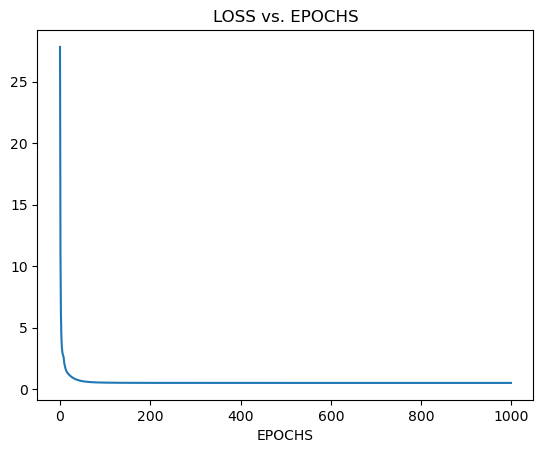

In [759]:
# Printing the parameters
print(f"w is:\n {w}")
print(f"b_2 is:\n {b_2}")
print(f"U is:\n {U}")
print(f"b_1 is:\n {b_1}")

# Printing the graph of the loss according to the number of epochs
plt.plot(range(epochs), Loss_array)
plt.title("LOSS vs. EPOCHS")
plt.xlabel("EPOCHS")
ylabel = plt.ylabel("LOSS")
ylabel.set_text('') # Set an empty string to prevent the text from being displayed